# Topic: CryptoCurrency Data Analysis (2013-2021)

## Group Members:
> 1. Yash Madhav Nerkar - 05
2. Dhruv Rajput       - 23
3. Bhavesh Sengunthar - 34

## What is CryptoCurrency?

### Technical Definition: 

"A cryptocurrency, crypto-currency, or crypto is a digital asset designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a form of a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership."

### In simple words:

Cryptocurrency is a digital currency which is decentralized i.e. the control of crypto is not under a particular authority and it works through distributed ledger system. 
It is based on the Block Chain Technology where each cryptocurrency transaction is recorded as a series of connected blocks 


## Types of CryptoCurrencies:
According to CoinMarketCap there are around 200 different types of cryptocurrencies in the market. Some of the notable currencies are: Bitcoin, Ethereum, Litecoin, Dogecoin, XRP Ripple, etc.

#### Out of all these cryptocurrencies we are going to analyze the performance and growth of 
1. Bitcoin
2. Ethereum
3. Dogecoin

### The data for the analysis is obtained from Kaggle.com

Link to the dataset: <a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory">Dataset Link</a>
#### The dataset contains performance from the year 2013 to Feb 2021

In [1]:
# Importing All the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
btc_df = pd.read_csv("datasets/btc_data.csv")
eth_df = pd.read_csv("datasets/eth_data.csv")
doge_df = pd.read_csv("datasets/dogecoin_data.csv")

In [3]:
btc_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,29-04-2013 23.59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,30-04-2013 23.59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,01-05-2013 23.59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,02-05-2013 23.59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,03-05-2013 23.59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,23-02-2021 23.59,54204.929760,45290.590270,54204.929760,48824.426870,1.061020e+11,9.099260e+11
2858,2859,Bitcoin,BTC,24-02-2021 23.59,51290.136690,47213.498160,48835.087660,49705.333320,6.369552e+10,9.263930e+11
2859,2860,Bitcoin,BTC,25-02-2021 23.59,51948.966980,47093.853020,49709.082420,47093.853020,5.450657e+10,8.777660e+11
2860,2861,Bitcoin,BTC,26-02-2021 23.59,48370.785260,44454.842110,47180.464050,46339.760080,3.509680e+11,8.637520e+11


### Obtaining Some meta data about the dataset:

In [4]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


In [5]:
btc_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2862.00000,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,1431.50000,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,826.33256,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,716.25000,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1431.50000,1197.334961,1164.174988,1180.100036,1182.809998,3.301950e+08,1.924238e+10
75%,2146.75000,8138.046590,7703.357500,7924.612339,7926.696939,1.296743e+10,1.387660e+11
max,2862.00000,58330.572140,55672.609510,57532.738860,57539.943670,3.509680e+11,1.072260e+12


### Firstly we will supress the scientific notation from the data set so that it becomes more readable for us

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Converting The Dataset from USD to INR

In [7]:
btc_df['High_INR']=btc_df['High'].apply(lambda x : x*73.25)
btc_df['Low_INR']=btc_df['Low'].apply(lambda x : x*73.25)
btc_df['Open_INR']=btc_df['Open'].apply(lambda x : x*73.25)
btc_df['Close_INR']=btc_df['Close'].apply(lambda x : x*73.25)
btc_df['Marketcap_INR']=btc_df['Marketcap'].apply(lambda x : x*73.25)

eth_df['High_INR']=eth_df['High'].apply(lambda x : x*73.25)
eth_df['Low_INR']=eth_df['Low'].apply(lambda x : x*73.25)
eth_df['Open_INR']=eth_df['Open'].apply(lambda x : x*73.25)
eth_df['Close_INR']=eth_df['Close'].apply(lambda x : x*73.25)
eth_df['Marketcap_INR']=eth_df['Marketcap'].apply(lambda x : x*73.25)

doge_df['High_INR']=doge_df['High'].apply(lambda x : x*73.25)
doge_df['Low_INR']=doge_df['Low'].apply(lambda x : x*73.25)
doge_df['Open_INR']=doge_df['Open'].apply(lambda x : x*73.25)
doge_df['Close_INR']=doge_df['Close'].apply(lambda x : x*73.25)
doge_df['Marketcap_INR']=doge_df['Marketcap'].apply(lambda x : x*73.25)

In [8]:
btc_df=btc_df.drop(['SNo','Name','High', 'Low', 'Open', 'Close', 'Volume','Marketcap'], axis=1)
eth_df=eth_df.drop(['SNo','Name','High', 'Low', 'Open', 'Close', 'Volume','Marketcap'], axis=1)
doge_df=doge_df.drop(['SNo','Name','High', 'Low', 'Open', 'Close', 'Volume','Marketcap'], axis=1)

### Changing the Date Column into Pandas Date-Time format for easy access and usability

In [9]:
btc_df['Date']=pd.to_datetime(btc_df.Date.apply(lambda x:x[0:11]))
eth_df['Date']=pd.to_datetime(eth_df.Date.apply(lambda x:x[0:11]))
doge_df['Date']=pd.to_datetime(doge_df.Date.apply(lambda x:x[0:11]))

In [10]:
btc_df.info()
eth_df.info()
doge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Symbol         2862 non-null   object        
 1   Date           2862 non-null   datetime64[ns]
 2   High_INR       2862 non-null   float64       
 3   Low_INR        2862 non-null   float64       
 4   Open_INR       2862 non-null   float64       
 5   Close_INR      2862 non-null   float64       
 6   Marketcap_INR  2862 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 156.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Symbol         2031 non-null   object        
 1   Date           2031 non-null   datetime64[ns]
 2   High_INR       2031 non-null   float64       
 

### Changing the index to The Date Column in all the dataframes

In [11]:
btc_df.set_index('Date')
eth_df.set_index('Date')
doge_df.set_index('Date')

,Symbol,High_INR,Low_INR,Open_INR,Close_INR,Marketcap_INR
Date,,,,,,
2013-12-16,DOGE,0.06343,0.01100,0.02192,0.01500,110540487.94436
2013-12-17,DOGE,0.02115,0.00847,0.01515,0.01967,158929644.63023
2013-12-18,DOGE,0.02649,0.01499,0.01958,0.02649,233590090.10540
2013-12-19,DOGE,0.11132,0.02405,0.02894,0.08515,816762347.74047
2013-12-20,DOGE,0.08372,0.04847,0.08372,0.05156,533577693.91987
...,...,...,...,...,...,...
2021-02-23,DOGE,3.93853,3.10656,3.93341,3.47147,446069525188.04248
2021-02-24,DOGE,4.38569,3.38531,3.47311,4.14268,532375011909.92249
2021-02-25,DOGE,4.23446,3.65292,4.14702,3.67476,472291437177.12000


### Adding the Month, Year and Weekday Column to the dataframes for deeper analysis

In [12]:
btc_df['Year']=pd.DatetimeIndex(btc_df.Date).year
btc_df['Month']=pd.DatetimeIndex(btc_df.Date).month
eth_df['Year']=pd.DatetimeIndex(eth_df.Date).year
eth_df['Month']=pd.DatetimeIndex(eth_df.Date).month
doge_df['Year']=pd.DatetimeIndex(doge_df.Date).year
doge_df['Month']=pd.DatetimeIndex(doge_df.Date).month
btc_df['Day']=pd.DatetimeIndex(btc_df.Date).weekday
eth_df['Day']=pd.DatetimeIndex(eth_df.Date).weekday
doge_df['Day']=pd.DatetimeIndex(doge_df.Date).weekday

In [13]:
btc_df

,Symbol,Date,High_INR,Low_INR,Open_INR,Close_INR,Marketcap_INR,Year,Month,Day
0,BTC,2013-04-29,10803.49648,9815.50000,9848.02301,10587.55451,117476069361.25000,2013,4,0
1,BTC,2013-04-30,10762.62197,9819.16273,10548.00000,10181.75000,113011061406.25000,2013,4,1
2,BTC,2013-01-05,10246.94246,7890.49009,10181.75000,8569.51735,95148424010.50000,2013,1,5
3,BTC,2013-02-05,9200.19989,6759.64907,8524.83480,7706.63243,85593906508.75000,2013,2,1
4,BTC,2013-03-05,7920.37588,5794.07489,7782.81250,7160.18750,79549146129.25000,2013,3,1
...,...,...,...,...,...,...,...,...,...,...
2857,BTC,2021-02-23,3970511.10492,3317535.73728,3970511.10492,3576389.26823,66652079500000.00000,2021,2,1
2858,BTC,2021-02-24,3757002.51254,3458388.74022,3577170.17109,3640915.66569,67858287250000.00000,2021,2,2
2859,BTC,2021-02-25,3805261.83128,3449624.73372,3641190.28726,3449624.73372,64296359500000.00000,2021,2,3
2860,BTC,2021-02-26,3543160.02029,3256317.18456,3455968.99166,3394387.42586,63269834000000.00000,2021,2,4


### Mean Yearwise Analysis of the coins (2013-2021)

In [34]:
btc_yearwise=btc_df.groupby('Year').mean()

In [15]:
btc_yearwise=btc_df.groupby('Year').mean().drop(['Month', 'Day'], axis=1)
eth_yearwise=eth_df.groupby('Year').mean().drop(['Month', 'Day'], axis=1)
doge_yearwise=doge_df.groupby('Year').mean().drop(['Month', 'Day'], axis=1)

In [35]:
btc_yearwise

,High_INR,Low_INR,Open_INR,Close_INR,Marketcap_INR,Month,Day
Year,,,,,,,
2013,19767.40849,17586.41130,18725.12439,18896.55917,224627092480.61469,7.68421,2.98785
2014,39577.83359,37677.37866,38705.64458,38620.07062,496840576539.61505,6.52603,2.99726
2015,20374.63240,19543.67800,19934.91507,19957.21013,287296865378.71918,6.52603,3.00000
2016,42067.64150,41053.20962,41543.10969,41642.06880,654104810089.17554,6.51366,3.00820
2017,303598.35533,279207.59574,290849.73513,293441.96330,4868012830772.02051,6.52603,3.00822
2018,570469.45939,538442.28621,556774.61803,554670.89756,9468831893103.26367,6.52603,2.99178
2019,553030.71720,529055.66125,540967.25231,541701.79009,9665025884185.79688,6.52603,2.99452
2020,828044.30105,794366.59465,809909.66242,814274.69439,15010207633717.29492,6.51366,2.99727
2021,3045657.26855,2788754.14419,2920587.21588,2941446.88138,54760205952586.20312,3.53448,3.00000


In [17]:
btc_yearwise.loc[2020]

High_INR                828044.30105
Low_INR                 794366.59465
Open_INR                809909.66242
Close_INR               814274.69439
Marketcap_INR   15010207633717.29492
Name: 2020, dtype: float64

In [18]:
sns.set_style("darkgrid")

### Mean MarketCap Analysis for the three coins 

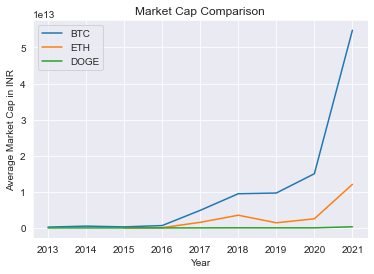

In [19]:
plt.plot(btc_yearwise.Marketcap_INR);
plt.plot(eth_yearwise.Marketcap_INR);
plt.plot(doge_yearwise.Marketcap_INR);

plt.xlabel('Year');
plt.ylabel('Average Market Cap in INR');

plt.title('Market Cap Comparison');
plt.legend(['BTC','ETH','DOGE']);

#### Key Observations:
1. All the three coins showed a tremendous amount of growth in their market cap over the last two years i.e from 2020-2021.
2. The growth of Ethereum is far less as compared to Bitcoin.
3. The growth of DOGE Coin is almost negligible as compared to the other two.

##### This is because Doge Coin is a relatively new coin. Bitcoin was introduced way before Doge Coin and also Bitcoin is far more secure and  reliable. 

#### Let us see the individual growth of DogeCoin Over the years

### DOGE COIN GROWTH OVER THE YEARS

In [20]:
doge_yearwise

,High_INR,Low_INR,Open_INR,Close_INR,Marketcap_INR
Year,,,,,
2013,0.04914,0.02801,0.03615,0.03666,472035849.97222
2014,0.03603,0.03168,0.03378,0.03372,2212311717.52418
2015,0.01080,0.01015,0.01045,0.01045,1044733591.09985
2016,0.01774,0.01679,0.01724,0.01725,1810696952.17464
2017,0.12510,0.10750,0.11542,0.11724,13002612907.02493
2018,0.33530,0.30219,0.31998,0.31867,36556885771.90247
2019,0.19271,0.18307,0.18779,0.18773,22567938282.48650
2020,0.20668,0.19481,0.20039,0.20096,25206387596.79555
2021,2.69228,2.11656,2.37044,2.41739,310152654066.64569


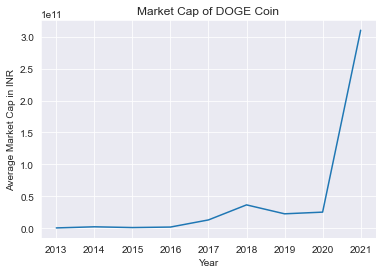

In [21]:
plt.plot(doge_yearwise.Marketcap_INR);

plt.xlabel('Year');
plt.ylabel('Average Market Cap in INR');

plt.title('Market Cap of DOGE Coin');

### Now Let us see The Month Wise Analysis of the Coins for the Year 2020

Firstly let us extract the rows from the dataframe where year is 2020<br><br>
Then we group the rows by Month where January corresponds to 1 February is 2 and so on

In [22]:
btc_2020 = btc_df[btc_df.Year == 2020]
eth_2020 = eth_df[eth_df.Year == 2020]
doge_2020 = doge_df[doge_df.Year == 2020]

In [23]:
btc_2020

,Symbol,Date,High_INR,Low_INR,Open_INR,Close_INR,Marketcap_INR,Year,Month,Day
2438,BTC,2020-01-01,531379.71726,525564.65921,527025.83688,527412.77429,9565058250000.00000,2020,1,2
2439,BTC,2020-02-01,528290.37228,508008.52545,527586.86969,511685.67757,9280701750000.00000,2020,2,5
2440,BTC,2020-03-01,543054.63100,506523.45026,511609.39583,538012.76640,9759317250000.00000,2020,3,6
2441,BTC,2020-04-01,544056.00941,535421.90138,538048.73889,542830.59346,9847876500000.00000,2020,4,2
2442,BTC,2020-05-01,552634.39587,542089.22984,542815.58659,542878.99420,9849927500000.00000,2020,5,4
...,...,...,...,...,...,...,...,...,...,...
2799,BTC,2020-12-27,2072157.53147,1898842.88492,1936684.09349,1924445.57725,35761602250000.00000,2020,12,6
2800,BTC,2020-12-28,2006252.45839,1919709.62487,1925070.16902,1983962.17794,36869581750000.00000,2020,12,0
2801,BTC,2020-12-29,2004905.24586,1903569.58363,1983742.56272,2004298.47802,37249383000000.00000,2020,12,1
2802,BTC,2020-12-30,2119689.45500,2004126.57126,2004126.57126,2112599.83802,39264490500000.00000,2020,12,2


In [24]:
btc_monthwise_2020 = btc_2020.groupby('Month').mean().drop('Year', axis=1)
eth_monthwise_2020 = eth_2020.groupby('Month').mean().drop('Year', axis=1)
doge_monthwise_2020 = doge_2020.groupby('Month').mean().drop('Year', axis=1)

## Now we plot the Average High Value Reached by Each coin for a Particular Month

####  Note: High Values are the maximum of the price the currency had for the day<br><br>
And we compare the average high price reached by the coin in a month to find which month gave maximum returns for the year 2020

### BITCOIN ANALYSIS

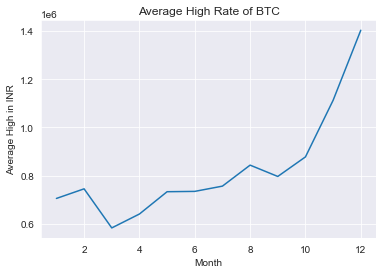

In [25]:
plt.plot(btc_monthwise_2020.High_INR);

plt.xlabel('Month');
plt.ylabel('Average High in INR');

plt.title('Average High Rate of BTC');

### ETHEREUM ANALYSIS

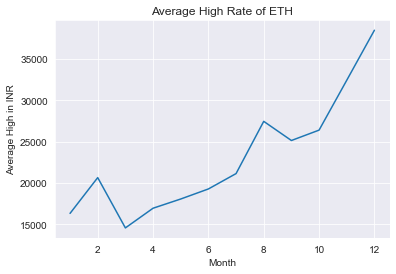

In [26]:
plt.plot(eth_monthwise_2020.High_INR);

plt.xlabel('Month');
plt.ylabel('Average High in INR');

plt.title('Average High Rate of ETH');

### DOGE ANALYSIS

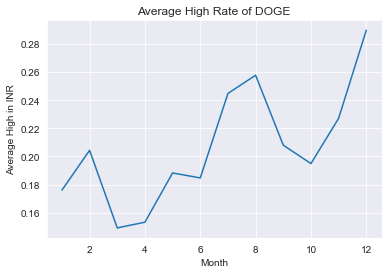

In [27]:
plt.plot(doge_monthwise_2020.High_INR);

plt.xlabel('Month');
plt.ylabel('Average High in INR');

plt.title('Average High Rate of DOGE');

## Observations:

### 1. It is clear that there is an upward trend in the high price of the coins for the months of October and December i.e. towards the year end.

This is because before the start of 2021 was the time where the crypto currency started becoming more and more popular.

### 2. Also the DOGE Coin is very much volatile in terms of high value.

This is because the DOGE Coin was started just as a joke and was not meant for commercial use until it started booming through Social Media


## Comparing the Price of the Coins on the basis of weekdays (Feb 2021)

In [28]:
btc_2021 = btc_df[btc_df.Year == 2021]
eth_2021 = eth_df[eth_df.Year == 2021]
doge_2021 = doge_df[doge_df.Year == 2021]

In [29]:
btc_df_feb_2021 = btc_2021[btc_2021.Month == 2]
eth_df_feb_2021 = eth_2021[eth_2021.Month == 2]
doge_df_feb_2021 = doge_2021[doge_2021.Month == 2]

In [30]:
btc_df_feb_2021

,Symbol,Date,High_INR,Low_INR,Open_INR,Close_INR,Marketcap_INR,Year,Month,Day
2805,BTC,2021-02-01,2428612.45357,2130929.02217,2151825.38955,2353322.37660,43745339500000.00000,2021,2,0
2836,BTC,2021-02-02,2629446.61676,2453085.26758,2456306.94908,2601128.67218,48426673750000.00000,2021,2,1
2847,BTC,2021-02-13,3519497.29122,3398234.68067,3478730.58752,3450479.15468,64275336750000.00000,2021,2,5
2848,BTC,2021-02-14,3624969.69373,3451137.82747,3451137.82747,3568541.50788,66478110750000.00000,2021,2,6
2849,BTC,2021-02-15,3580135.62043,3394952.69684,3567021.31034,3511975.41280,65427632500000.00000,2021,2,0
2850,BTC,2021-02-16,3687485.81306,3457495.49969,3511931.54923,3603890.57565,67142634750000.00000,2021,2,1
2851,BTC,2021-02-17,3848109.22321,3594551.62550,3604432.99850,3819914.80230,71170579000000.00000,2021,2,2
2852,BTC,2021-02-18,3843728.35606,3736904.75329,3819326.25174,3785545.10754,70533523750000.00000,2021,2,3
2853,BTC,2021-02-19,4110324.90279,3731155.44649,3785265.62949,4093805.79206,76281085000000.00000,2021,2,4
2854,BTC,2021-02-20,4212257.96492,4001395.50389,4093747.34076,4109289.87736,76573352500000.00000,2021,2,5


In [31]:
btc_daywise = btc_df_feb_2021.groupby('Day').mean().drop(['Year','Month'], axis=1)
eth_daywise = eth_df_feb_2021.groupby('Day').mean().drop(['Year','Month'], axis=1)
doge_daywise = doge_df_feb_2021.groupby('Day').mean().drop(['Year','Month'], axis=1)

In [32]:
btc_daywise

,High_INR,Low_INR,Open_INR,Close_INR,Marketcap_INR
Day,,,,,
0,3407689.61414,3037585.28973,3311039.94046,3278661.30376,61056951500000.00000
1,3429147.84491,3076038.83485,3312916.53441,3260469.50535,60740462666666.66406
2,3802555.86787,3526470.18286,3590801.58480,3730415.23400,69514433125000.00000
3,3824495.09367,3593264.74350,3730258.26950,3617584.92063,67414941625000.00000
4,3826742.46154,3493736.31552,3620617.31058,3744096.60896,69775459500000.00000
5,3755435.76365,3571862.10740,3655744.16495,3647691.02943,67971775916666.66406
6,3948842.05149,3764578.23704,3779080.22589,3891671.19086,72510577875000.00000


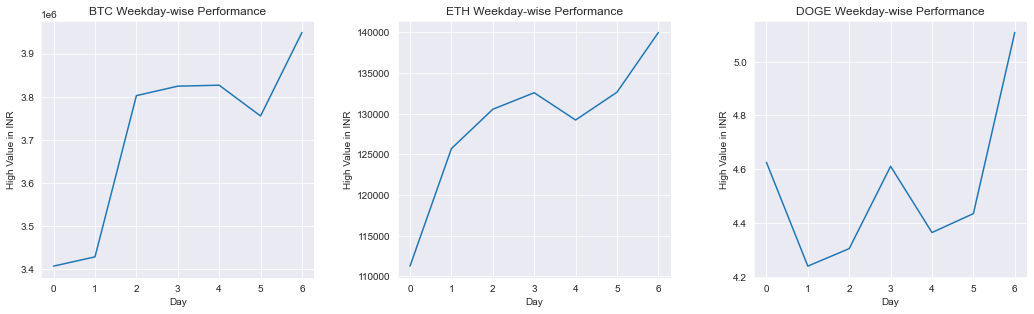

In [33]:
fig, axes = plt.subplots(1 , 3, figsize=(15,5))


axes[0].plot(btc_daywise.High_INR)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('High Value in INR')
axes[0].set_title('BTC Weekday-wise Performance')

axes[1].plot(eth_daywise.High_INR)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('High Value in INR')
axes[1].set_title('ETH Weekday-wise Performance')

axes[2].plot(doge_daywise.High_INR)
axes[2].set_xlabel('Day')
axes[2].set_ylabel('High Value in INR')
axes[2].set_title('DOGE Weekday-wise Performance')

plt.tight_layout(pad=3)

### Key Observations:

1. All the coins show a spike on Sundays.
2. Bitcoin has the lowest dip on Mondays.
3. Ethereum also has its lowest dip on Mondays.
4. Whereas DOGE Coin has a low dip on Tuesdays.


### Conclusion: 
1. This shows that most trading of Ethereum, Bitcoin and Doge Coin happens on Sundays where alot of people buy it and try to sell it as the new week starts on Monday.

2. For Doge Coin people tend to buy it on Sundays and try to hold it till Tuesday and sell it. Thus we have a huge dip on Tuesdays due to excessive selling.


## To Conclude:

Right from the beginning All the Crypto currencies have shown a sharp uptrend in their high values as well as Market Cap. So the Crypto and Block Chain industry is growing hugely during this time especially during the pandemic where this is the only source of profitable investments.

#### Note: Bitcoin and Ethereum are less volatile as compared to Doge Coin and hence they're a safer option when compared to DOGE. Also Market Cap of Bitcoin and Ethereum is far greater as compared to DOGE Coin.


### This is a great time to start investing in this technology as it is sure to reach new heights in the near future.
